# Color Palettes in Movies

_by Austin Poor_

Algorithmically finding color palettes from movie stills.

In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from PIL import Image

Read in the test image and display it

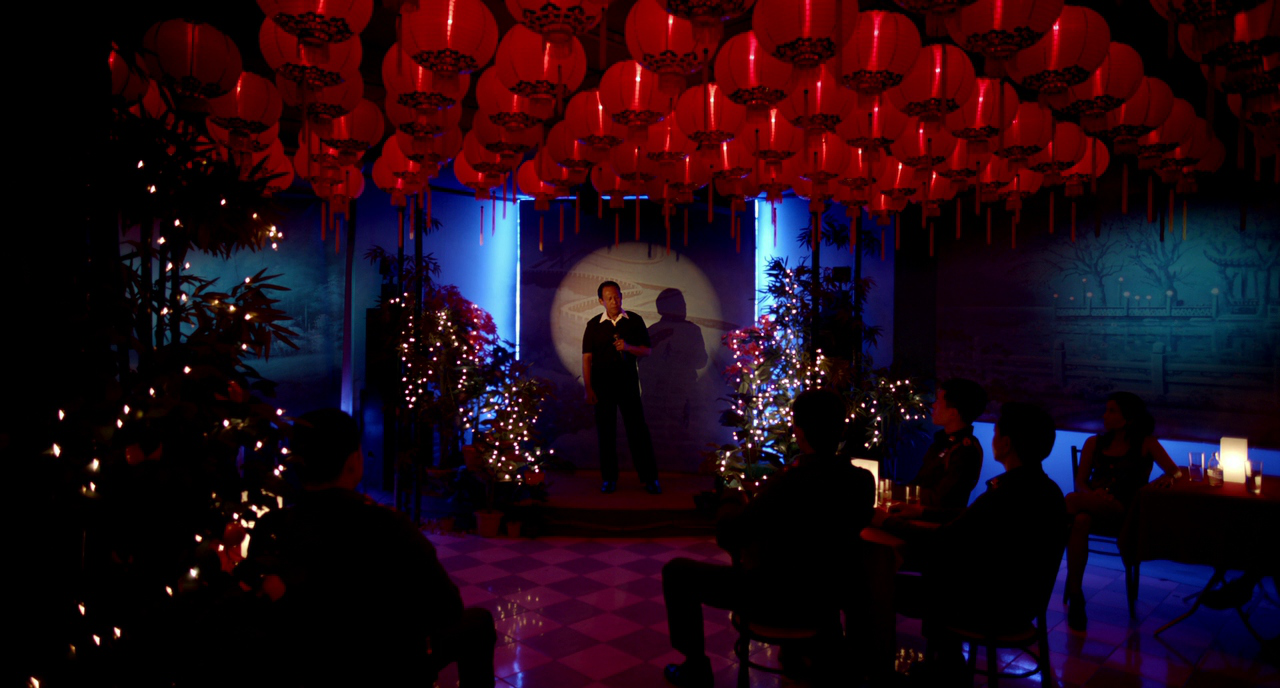

In [2]:
image_path = Path("stills/18 (795).jpg")
image = Image.open(image_path.open("rb"))
image

Convert it to a numpy array and check its dimensions

In [3]:
arr = np.array(image)
arr.shape

(688, 1280, 3)

Convert the 3D array (of height, width, color-channel) to be a 2D array (of pixel-number, color-channel).

In [4]:
pixels = arr.reshape((-1,3))
pixels.shape

(880640, 3)

Check the range of pixel values.

In [5]:
pixels.min(), pixels.mean(), pixels.max()

(0, 21.213414486434107, 255)

Re-center the pixels to be between 0 and 1

In [6]:
pixels = pixels.astype("float32") / 255
pixels.min(), pixels.mean(), pixels.max()

(0.0, 0.083189845, 1.0)

Let's examine a few stats about the color values

In [7]:
pixels.mean(0)

array([0.12709807, 0.03994883, 0.08304717], dtype=float32)

In [8]:
np.median(pixels,0)

array([0.04705882, 0.        , 0.00392157], dtype=float32)

Can we plot the color values as a histogram?

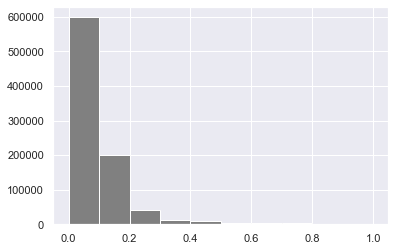

In [9]:
plt.hist(
    pixels.mean(1),
    color="grey"
);

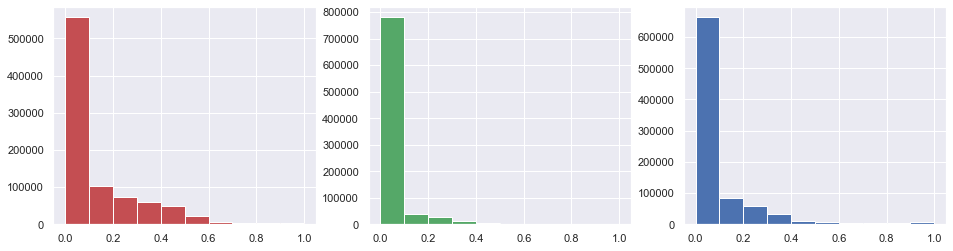

In [10]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.hist(
    pixels[:,0],
    color="r"
)
plt.subplot(1,3,2)
plt.hist(
    pixels[:,1],
    color="g"
)
plt.subplot(1,3,3)
plt.hist(
    pixels[:,2],
    color="b"
);

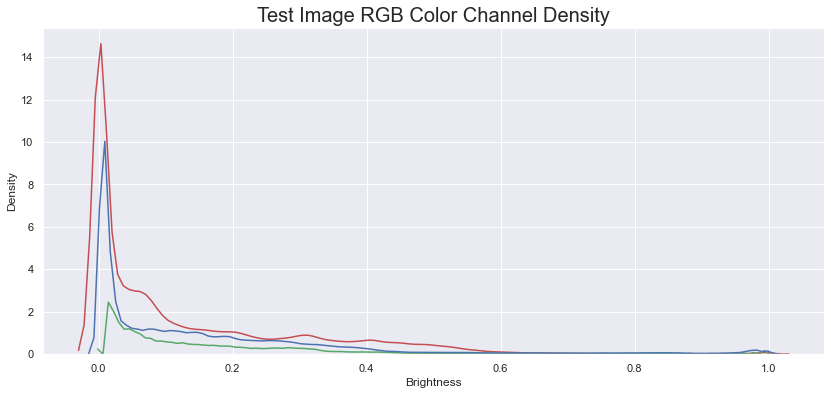

In [11]:
plt.figure(figsize=(14,6))
sns.kdeplot(
    pixels[:,0],
    color="r"
)
sns.kdeplot(
    pixels[:,1],
    color="g"
)
sns.kdeplot(
    pixels[:,2],
    color="b"
)
plt.xlabel("Brightness")
plt.ylabel("Density")
plt.title(
    "Test Image RGB Color Channel Density",
    fontsize=20
);

Now, on to grouping the pixels into a palette.

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=8)
predictions = kmeans.fit_predict(pixels)
centers = kmeans.cluster_centers_

In [14]:
centers

array([[0.4637801 , 0.00514091, 0.00880375],
       [0.02069154, 0.00205165, 0.01047989],
       [0.22653878, 0.40711662, 0.805365  ],
       [0.08596028, 0.18471733, 0.38879102],
       [0.0680481 , 0.04856092, 0.20017454],
       [0.7087608 , 0.82065606, 0.87476987],
       [0.23804879, 0.01275032, 0.04554171],
       [0.4974913 , 0.31622034, 0.29991716]], dtype=float32)

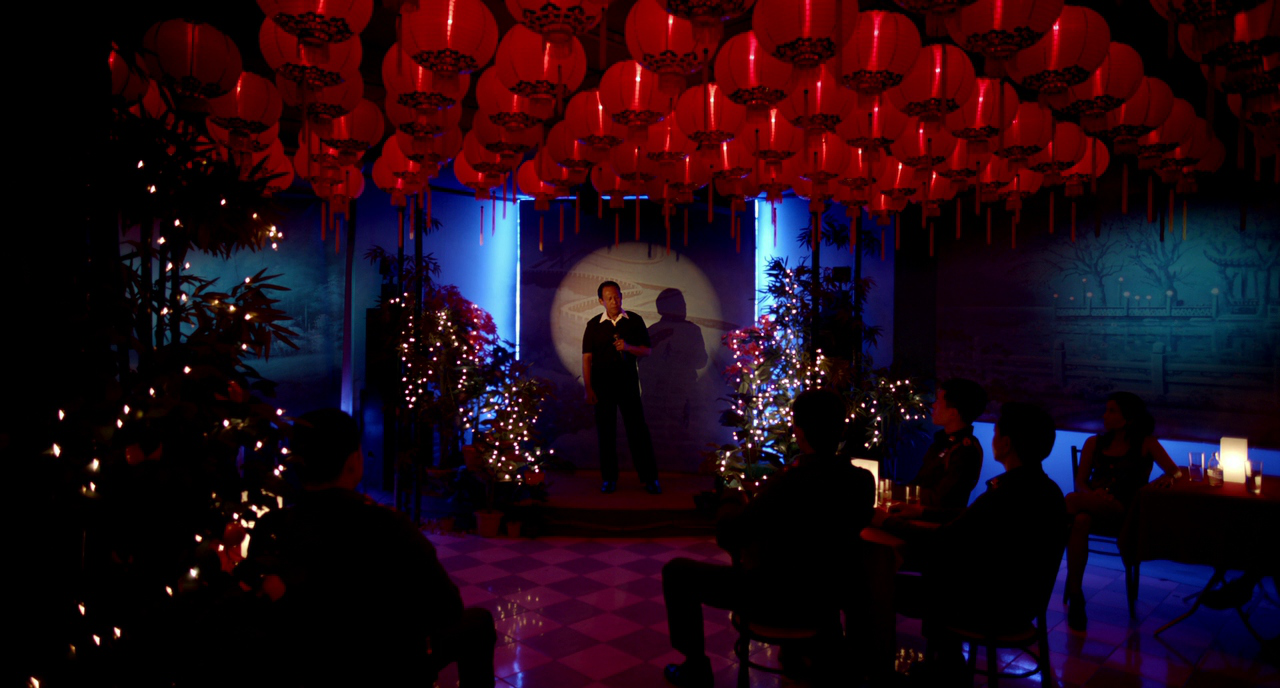

In [15]:
image

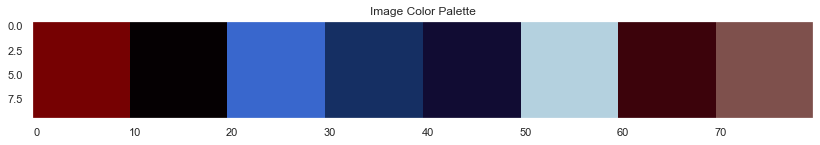

In [16]:
plt.figure(figsize=(14,8))
plt.imshow(centers[np.concatenate([[i] * 100 for i in range(len(centers))]).reshape((-1,10)).T])
plt.title("Image Color Palette")
plt.grid()

In [17]:
def kmeans_nclusters(n=8):
    return KMeans(n_clusters=n).fit(pixels).cluster_centers_

Now let's try it with a few different palette widths

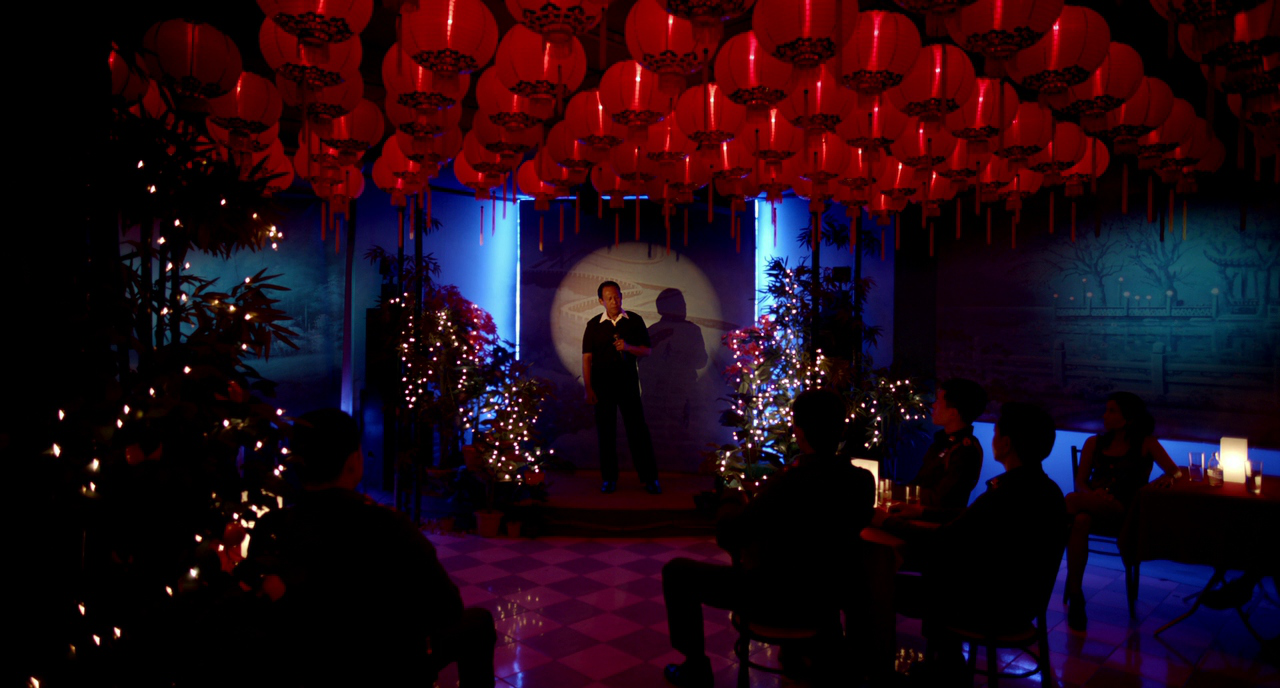

In [18]:
image

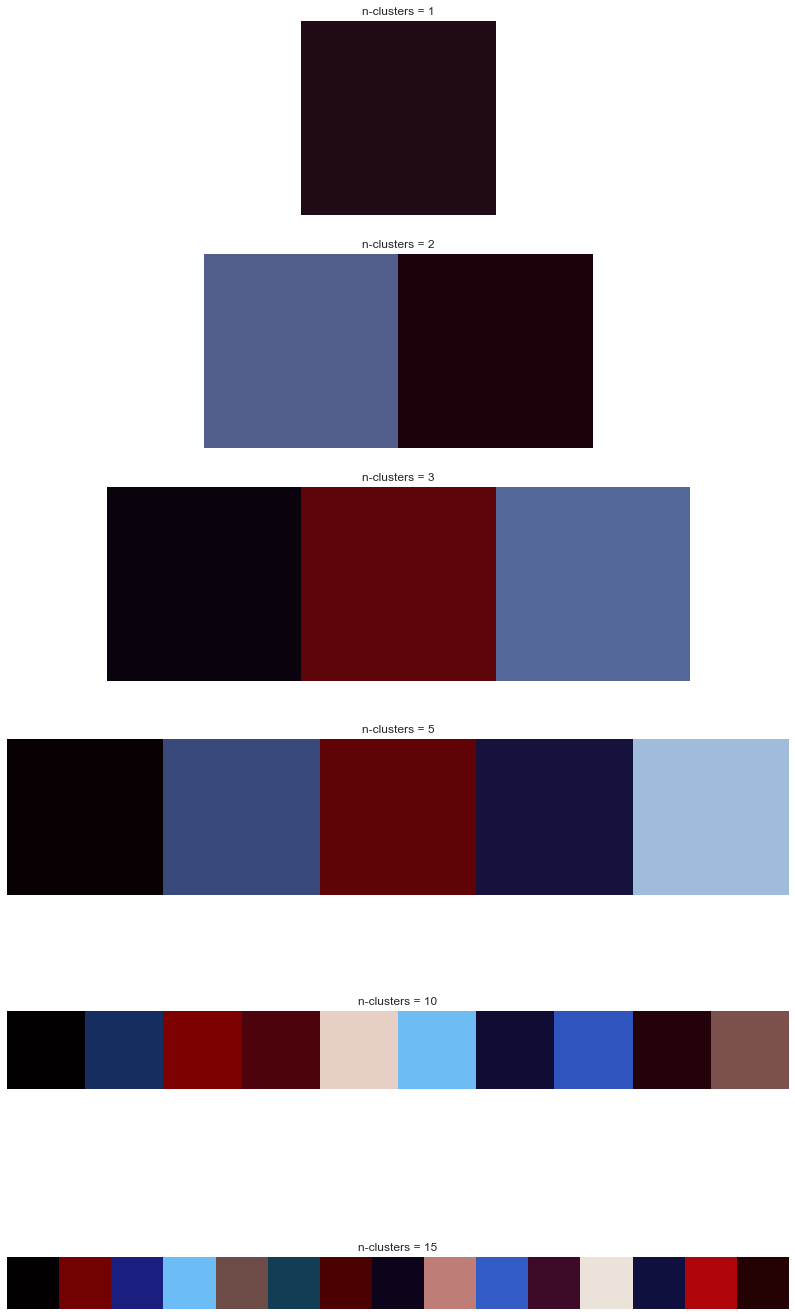

In [19]:
plt.figure(figsize=(14,25))
palette_sizes = [1,2,3,5,10,15]
for i, s in enumerate(palette_sizes):
    plt.subplot(len(palette_sizes),1,i+1)
    kmcenters = kmeans_nclusters(s)    
    plt.imshow(kmcenters[np.concatenate([[i] * 100 for i in range(len(kmcenters))]).reshape((-1,10)).T])
    plt.title(f"n-clusters = {s}")
    plt.grid()
    plt.axis('off')
plt.show()